<a href="https://colab.research.google.com/github/bbhavii/Project-Work/blob/main/AML_Final2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sentence_transformers
!pip install tweet-preprocessor
!pip install demoji 
from sentence_transformers import SentenceTransformer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import seaborn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import preprocessor as p
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = nltk.corpus.stopwords.words('english')
stop_words.extend(['http','https','rt','user','co','like','one','get','bit','say','thank','know','go'])
#https://towardsdatascience.com/the-most-favorable-pre-trained-sentiment-classifiers-in-python-9107c06442c6
!pip install vaderSentiment
!pip install nltk
import nltk.corpus
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.downloader.download('vader_lexicon')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
import tensorflow as tf
!pip install tensorflow-text
import tensorflow_hub as hub
import tensorflow as tf
import tensorflow_text as tf_text
import demoji 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.4 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=e12c394e8ff33f9de4d3a400261901a088ce94dbf326c435a1609f54f75f73c2
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 44.5 MB/s eta 0:00:00


In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
df = pd.read_csv("Mental-Health-Twitter.csv")
df = df.iloc[:,1:11]
df = df.dropna()
df = df.drop_duplicates()
duplicate = df[df.duplicated()]
no_hashtags = []
hashtags = []
links = []
'''
numbers_list = [142, 393, 538, 679, 826, 977, 1166, 1441, 1501, 1645, 2042, 2183, 2326, 2922, 3187, 3322, 3416, 3563, 3577, 3709, 3838, 3937, 4077, 4213, 
                4469, 4596, 5110, 5250, 5392, 5431, 5574, 5707, 5821, 6263, 6395, 6568, 6776, 6920, 7065, 7164, 7295, 7507, 7654, 7841, 7928, 8070, 8198, 
                8339, 8603, 8745, 8895, 9042, 9296, 9440, 9584, 9862, 10141, 10278, 10404, 10668, 10802, 10935, 11069, 11324, 11452, 11664, 11810, 11953, 
                12459, 12743, 12888, 13032, 13176, 13319, 13602, 13747, 13997, 14140, 14281, 14423, 14567, 14855, 14976, 15083, 15199, 15303, 15496, 15606, 
                15713, 15829, 16056, 16157, 16433, 16640, 16844, 16856, 16927, 16961, 17094, 17378, 17521, 17984, 18123, 18301, 18390, 18456, 18689, 18942, 
                19096, 19189, 19266, 19344, 19425, 19502, 19599, 19788]
'''
emo=[]
for row in df['post_text']:
    try:
      emoji = row
      emo.append(demoji.findall(emoji))
    except KeyError:
      continue

#print(len(emo), df.shape[0])

df['emo'] = emo


for index in range(df.shape[0]):
  try:
    for key, value in df['emo'][index].items():
      #print(index, key, value)
      df['post_text'][index] = df['post_text'][index].replace(key, value)
  except KeyError:
    continue 

for text in df['post_text']:
  #print(text)
  link = re.findall(r'https?://(\S+)', text) + re.findall(r'(\S+).co', text) + re.findall(r'http?://(\S+)',text)
  links.append(link)
  hashtags.append(re.findall(r'#(\w+)', text))
  text = p.clean(text)
  text = re.sub(r'@(\w+)',' ',text)
  text = re.sub(r'\d*:\d*',' ',text)
  no_hashtags.append(re.sub(r'#(\w+)'," ", text).lower())

df['hashtags'] = hashtags
df['links'] = links
df['clean_post_text'] = no_hashtags
#df.head(25)
display(df)

<ipython-input-3-3fd3c580f3f0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['post_text'][index] = df['post_text'][index].replace(key, value)


,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label,emo,hashtags,links,clean_post_text
0,2.949876e+10,Tue Nov 02 19:31:09 +0000 2010,Yeah I have been diagnosed with depression and...,2.112576e+08,0,1,0,3,0,1,{},[],[],yeah i have been diagnosed with depression and...
1,2.949832e+10,Tue Nov 02 19:24:45 +0000 2010,Hey guys! There’s still 2 days left to Join th...,2.112576e+08,0,1,0,3,0,1,{},[],[JoinTheSurge],hey guys! theres still days left to join the s...
3,7.090000e+17,Sun Mar 13 16:51:11 +0000 2016,I've been diagnosed with PCDD...Post Congress ...,3.279878e+09,48,48,49,6,0,1,{},[],[highly],i've been diagnosed with pcdd...post congress ...
4,5.840000e+17,Sat Apr 04 01:30:57 +0000 2015,I have been diagnosed with depression,3.138164e+09,4,10,1,11,0,1,{},[],[],i have been diagnosed with depression
5,5.840000e+17,Sat Apr 04 01:16:01 +0000 2015,I like being alone,3.138164e+09,4,10,1,11,0,1,{},[],[],i like being alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,8.190000e+17,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,1.169876e+09,442,230,7,1063601,0,0,{},[],[],a day without sunshine is like night.
19996,8.190000e+17,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) ...",1.169876e+09,442,230,7,1063601,0,0,{},[],[],"boren's laws (1) when in charge, ponder. (2) ..."
19997,8.190000e+17,Thu Jan 12 00:05:42 +0000 2017,The flow chart is a most thoroughly oversold p...,1.169876e+09,442,230,7,1063601,0,0,{},[],[],the flow chart is a most thoroughly oversold p...
19998,8.190000e+17,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never ...",1.169876e+09,442,230,7,1063601,0,0,{},[],[],"ships are safe in harbor, but they were never ..."


In [ ]:
model_st1 = SentenceTransformer('all-mpnet-base-v2')

embed = model_st1.encode(list(df['clean_post_text']))
em_list = []
for em in embed:
  em_list.append(em)

df['embed'] = em_list

mypca = PCA(2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


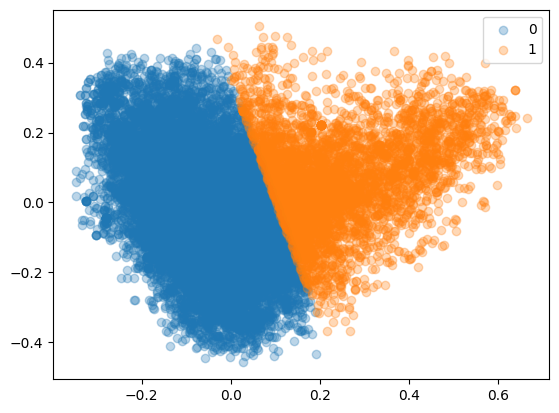

In [ ]:
neutral = mypca.fit_transform(list(df['embed']))

kmeans = KMeans(n_clusters=2)

cluster = kmeans.fit_predict(neutral)

df['clusters'] = cluster

for i in np.unique(cluster):
    plt.scatter(neutral[cluster==i,0],neutral[cluster==i,1],label=i,alpha=0.3)
plt.legend()
plt.show()

In [ ]:
df.head()

,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label,emo,hashtags,links,clean_post_text,embed,clusters
0,2.949876e+10,Tue Nov 02 19:31:09 +0000 2010,Yeah I have been diagnosed with depression and...,2.112576e+08,0,1,0,3,0,1,{},[],[],yeah i have been diagnosed with depression and...,"[0.010648829, 0.010856044, -0.067786545, 0.006...",1
1,2.949832e+10,Tue Nov 02 19:24:45 +0000 2010,Hey guys! There’s still 2 days left to Join th...,2.112576e+08,0,1,0,3,0,1,{},[],[JoinTheSurge],hey guys! theres still days left to join the s...,"[-0.038374837, 0.060008902, -0.024688136, -0.0...",0
3,7.090000e+17,Sun Mar 13 16:51:11 +0000 2016,I've been diagnosed with PCDD...Post Congress ...,3.279878e+09,48,48,49,6,0,1,{},[],[highly],i've been diagnosed with pcdd...post congress ...,"[-0.02993774, 0.065582156, -0.012507787, -0.02...",1
4,5.840000e+17,Sat Apr 04 01:30:57 +0000 2015,I have been diagnosed with depression,3.138164e+09,4,10,1,11,0,1,{},[],[],i have been diagnosed with depression,"[0.05476782, 0.019272259, -0.05053594, -0.0616...",1
5,5.840000e+17,Sat Apr 04 01:16:01 +0000 2015,I like being alone,3.138164e+09,4,10,1,11,0,1,{},[],[],i like being alone,"[-0.0356781, 0.06804453, -0.008092677, -0.0457...",1


In [ ]:
count=0
count1 = 0
for row in df.itertuples():
  #print((row[10]==1 & row[12]==0))
  if (row[10]==0 and row[16]==1):
    #print('yay1')
    count+=1
  elif (row[10]==1 and row[16]==0):
    #print('yay2')
    count+=1
  elif (row[10]==row[16]):
    count1+=1

print('Different labels: ',count/20000)
print('Same labels: ',count1/20000)

Different labels:  0.3697
Same labels:  0.6244


In [ ]:
stop_words.extend(['http','https','rt','user','co','like','one','get','bit','say','thank','know','go','new','amp','ly','misslusyd',
                   'good','people','realdonaldtrump','yong'])

In [ ]:
for num in np.arange(0,2,1):
  vectorizor = CountVectorizer().fit(df[df['clusters']==num]['post_text'])
  bag_of_words = vectorizor.transform(df[df['clusters']==num]['post_text'])
  bag_of_stop_words = vectorizor.transform(stop_words)
  sum_of_words = bag_of_words.sum(axis=0) 
  words_freq = []
  for word, idx in vectorizor.vocabulary_.items():
    if(word not in stop_words):
      words_freq.append([word, sum_of_words[0, idx]])
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
  print('Cluster number ',num,words_freq[:7])

Cluster number  0 [['face', 829], ['love', 533], ['tears', 430], ['trump', 421], ['twitter', 328], ['heart', 323], ['see', 319]]
Cluster number  1 [['depression', 875], ['treatments', 267], ['overcome', 216], ['health', 165], ['life', 164], ['help', 158], ['mental', 132]]


In [ ]:
for num in np.arange(0,2,1):
  vectorizor = CountVectorizer().fit(df[df['label']==num]['post_text'])
  bag_of_words = vectorizor.transform(df[df['label']==num]['post_text'])
  bag_of_stop_words = vectorizor.transform(stop_words)
  sum_of_words = bag_of_words.sum(axis=0) 
  words_freq = []
  for word, idx in vectorizor.vocabulary_.items():
    if(word not in stop_words):
      words_freq.append([word, sum_of_words[0, idx]])
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
  print('Label ',num,words_freq[:7])

Label  0 [['trump', 418], ['face', 327], ['love', 281], ['twitter', 266], ['following', 211], ['see', 201], ['hello', 197]]
Label  1 [['depression', 881], ['face', 625], ['tears', 334], ['love', 313], ['heart', 292], ['treatments', 267], ['time', 232]]


In [ ]:
vectorizor = CountVectorizer().fit(df['post_text'])
bag_of_words = vectorizor.transform(df['post_text'])
#stop_words.extend(['specified'])
bag_of_stop_words = vectorizor.transform(stop_words)
sum_of_words = bag_of_words.sum(axis=0) 
words_freq = []
for word, idx in vectorizor.vocabulary_.items():
  if(word not in stop_words):
    words_freq.append([word, sum_of_words[0, idx]])
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
print('Neutral words: ', words_freq[:10])

Neutral words:  [['face', 952], ['depression', 889], ['love', 594], ['tears', 459], ['trump', 422], ['heart', 409], ['time', 402], ['need', 374], ['see', 369], ['think', 367]]


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

df['clean_post_text'] = df['clean_post_text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Create a text string or load your data
text = text = ' '.join(df['clean_post_text'].astype(str))
stop_words.extend(['http','https','rt','user','co','like','one','get','bit','say','know','go','one','know','ly','im','m','u','amp','thats','really'])
# Create the word cloud object
wordcloud = WordCloud(stopwords = stop_words,width=800, height=400, background_color='white').generate(text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
first_person_pronouns = ['I', 'me', 'my', 'mine', 'we', 'us', 'our', 'ours', 'myself', 'ourselves']

absolutist_words1 = ['absolutely', 'all', 'always', 'complete', 'completely', 'constant', 'constantly', 'definitely', 'entire', 'ever', 'every', 
                     'everyone', 'everything', 'full', 'must', 'never',
                     'nothing', 'totally', 'whole']
negative_words = ['I', 'me', 'my', 'mine', 'we', 'us', 'our', 'ours', 'myself', 
                       'ourselves','absolutely', 'all', 'always', 'complete', 'completely', 'constant', 
                       'constantly', 'definitely', 'entire', 'ever', 'every', 'everyone', 'everything', 
                       'full', 'must', 'never',
                        'nothing', 'totally', 'whole']

#my_dict = dict.fromkeys(first_person_pronouns + absolutist_words, -1)
first_person_dict = {pronoun: -2 for pronoun in first_person_pronouns}
absolutist_dict = {word: -2 for word in absolutist_words1}

# Combine the two dictionaries
combined_dict = {**first_person_dict, **absolutist_dict}

SIA = SentimentIntensityAnalyzer()

SIA.lexicon.update(combined_dict)
rate = []
label_per_tweet = []
for row in df.itertuples():
  text = row[14]
  #print(text)
  rate1 = SIA.polarity_scores(text)
  if any(word in text for word in negative_words):
    rate1["neg"] += -2
    rate1["compound"] = SIA.polarity_scores(text)["compound"]
  length_factor = len(text) / 100
  rate1['compound'] *= length_factor
  rate.append(rate1['compound'])
  rate1 = rate1['compound']
  #label_per_tweet.append(rate1)
  if(rate1>=0):
    label_per_tweet.append(0)
  else:
    label_per_tweet.append(1)

df['rate'] = rate
df['label_per_tweet'] = label_per_tweet

df['label_per_tweet'].value_counts()

0    11835
1     8047
Name: label_per_tweet, dtype: int64

In [ ]:
users = list(df['user_id'].unique())
new_rating = []
new_label = []
original_label = []
tweet_count = []
df_users = pd.DataFrame(users)
for user in users:
  user_negativity = 0
  #print('User ID: ',user)

  original_label.append(df.iloc[df['user_id'].eq(user).idxmax()]['label'])
  df_user = df[df['user_id']==user]
  #df_user.head()
  for row in df_user.itertuples():
    user_negativity = user_negativity+row[16]
  score = np.round(user_negativity/len(df_user),3)
  tweet_count.append(len(df_user))
  new_rating.append(score)
  if score>= 0.25000:
    new_label.append(1)
  else:
    new_label.append(0)
  #print(user_negativity)
  #print('Rate of Depressive Tweets',user_negativity,'/',len(df_user),' : ',np.round(user_negativity/len(df_user),3))
df_users['tweet_count'] = tweet_count
df_users['original_label'] = original_label
df_users['new_rating'] = new_rating
df_users['new_label'] = new_label
df_users = df_users.sort_values('tweet_count', ascending=True)
display(df_users)

,0,tweet_count,original_label,new_rating,new_label
9,3.517771e+08,1,0,1.000,1
1,3.279878e+09,1,1,1.000,1
13,2.565061e+09,1,0,1.000,1
4,8.052341e+08,1,1,1.000,1
7,2.848936e+09,1,1,1.000,1
...,...,...,...,...,...
60,1.616997e+09,884,1,0.698,1
25,1.456266e+08,1270,0,0.503,1
62,3.249600e+09,1495,0,0.346,1
69,1.458226e+09,1580,0,0.147,0


In [ ]:
m = 0
n1 = 0
n2 = 0
for row in df_users[12:].itertuples():
  if row[3] == row [5]:
    m+=1
  elif row[3] == 0 and row[5] == 1:
    n1+=1
  else:
    n2+=1

print('The matches are : ', np.round(m/(m+n1+n2)*100),'%.')

The matches are :  77.0 %.


In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(df['label_per_tweet']),
                                        y = df['label_per_tweet'])

class_weights = dict(zip([0,1,2], class_weights))
print('Class Weights for training set :',class_weights)

Class Weights for training set : {0: 0.8399662019433882, 1: 1.23536721759662}


In [ ]:
X_train = tf.keras.layers.Input(shape=(), dtype=tf.string, name="X_data")
X_train_pp = bert_preprocess(X_train)
X_train_embedded = bert_encoder(X_train_pp)

In [ ]:
l = tf.keras.layers.Conv1D(filters=8,kernel_size=2,activation='relu')(X_train_embedded['sequence_output'])
l = tf.keras.layers.MaxPool1D(pool_size=2)(l)
l = tf.keras.layers.Dropout(0.2)(l)
l = tf.keras.layers.Dense(32, activation='relu')(l)
l = tf.keras.layers.Dropout(0.2)(l)
l = tf.keras.layers.Dense(16, activation='relu')(l)
l = tf.keras.layers.Dropout(0.2)(l)
l = tf.keras.layers.Dense(16, activation='relu')(l)
l = tf.keras.layers.Dropout(0.2)(l)
l = tf.keras.layers.Flatten()(l)
l = tf.keras.layers.Dense(1, activation='sigmoid')(l)

model = tf.keras.Model(inputs=[X_train], outputs = [l])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 X_data (InputLayer)            [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['X_data[0][0]']                 
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [ ]:
history = model.fit(df['clean_post_text'][:16000],
                    df['label_per_tweet'][:16000],
                    epochs = 20,
                    batch_size = 64,
                    verbose = 1,
                    class_weight = class_weights,
                    validation_data = (df['clean_post_text'][16000:18000],df['label_per_tweet'][16000:18000]))

Epoch 1/20
250/250 [==============================] - 227s 886ms/step - loss: 0.5702 - accuracy: 0.6948 - val_loss: 0.3189 - val_accuracy: 0.8240
Epoch 2/20
250/250 [==============================] - 206s 826ms/step - loss: 0.5003 - accuracy: 0.7515 - val_loss: 0.2991 - val_accuracy: 0.8370
Epoch 3/20
250/250 [==============================] - 225s 899ms/step - loss: 0.4636 - accuracy: 0.7756 - val_loss: 0.2275 - val_accuracy: 0.9060
Epoch 4/20
250/250 [==============================] - 205s 821ms/step - loss: 0.4342 - accuracy: 0.7991 - val_loss: 0.2149 - val_accuracy: 0.9160
Epoch 5/20
250/250 [==============================] - 223s 893ms/step - loss: 0.4115 - accuracy: 0.8128 - val_loss: 0.2237 - val_accuracy: 0.9110
Epoch 6/20
250/250 [==============================] - 205s 819ms/step - loss: 0.3904 - accuracy: 0.8209 - val_loss: 0.2297 - val_accuracy: 0.9170
Epoch 7/20
250/250 [==============================] - 223s 891ms/step - loss: 0.3717 - accuracy: 0.8351 - val_loss: 0.2194 -

In [ ]:
import joblib
from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/MyDrive/tf_model')
#model = tf.keras.models.load_model('/content/drive/MyDrive/tf_model')

Mounted at /content/drive


In [ ]:
model1 = tf.keras.models.load_model('/content/drive/MyDrive/tf_model')

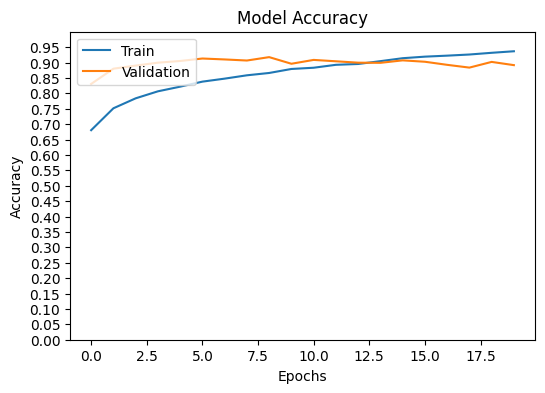

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylim(0.0,1.0)
plt.yticks(np.arange(0.0,1.0,0.05))
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show();

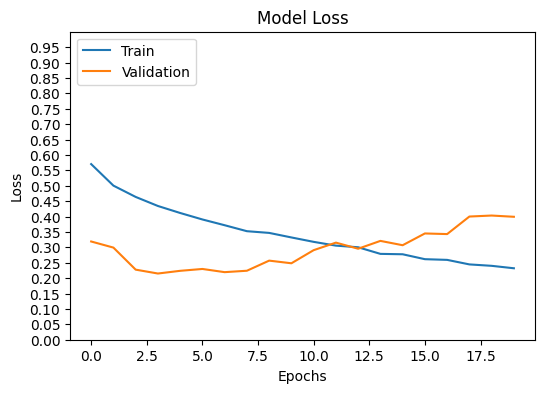

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylim(0.0,1.0)
plt.yticks(np.arange(0.0,1.0,0.05))
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show();

In [ ]:
predictions = model.predict((df['clean_post_text'][19000:]), verbose=1)

y_classes = predictions

metrics = tf.keras.metrics.Accuracy()
threshold = 0.5
y_pred_class = np.where(y_classes >= threshold, 1, 0)
#print(y_pred_class)
metrics.update_state(y_pred_class, df['label_per_tweet'][19000:])
print('Test Accuracy: ', metrics.result().numpy())

print(tf.math.confusion_matrix(
    df['label_per_tweet'][19000:],
    y_pred_class,
    num_classes=2))

28/28 [==============================] - 9s 334ms/step
Test Accuracy:  0.7630386
tf.Tensor(
[[391 117]
 [ 92 282]], shape=(2, 2), dtype=int32)


In [ ]:
threshold = 0.68
y_pred_class = np.where(y_classes >= threshold, 1, 0)
#print(y_pred_class)
metrics.update_state(y_pred_class, df['label_per_tweet'][19000:])
print('Test Accuracy: ', metrics.result().numpy())

Test Accuracy:  0.7643613


In [ ]:
results = pd.DataFrame(y_pred_class)
results['true'] = list(df['label_per_tweet'][19000:])
results['tweets'] = list(df['clean_post_text'][19000:])
display(results)

,0,true,tweets
0,0,0,"sebab dia cakap ""without a proper diet &amp; t..."
1,0,1,-me work out. at least. for the initial stages...
2,0,1,aim for is a ripped body huehue. oh. tadi doct...
3,0,1,my resolution for was to be myself. on the out...
4,0,0,this -year-old was born and raised in japan ...
...,...,...,...
877,0,1,a day without sunshine is like night.
878,0,1,"boren's laws (1) when in charge, ponder. (2) ..."
879,0,0,the flow chart is a most thoroughly oversold p...
880,0,1,"ships are safe in harbor, but they were never ..."


In [ ]:
m = 0
n1 = 0
n2 = 0
for row in results.itertuples():
  if row[1] == row [3]:
    m+=1
  elif row[1] == 0 and row[3] == 1:
    n1+=1
  else:
    n2+=1

print(m, n1, n2, (m/(m+1+2)))
print('The accuracy is ',(m/(m+n1+n2)*100), ' %.')

1544 134 204 0.9980607627666451
The accuracy is  82.0403825717322  %.


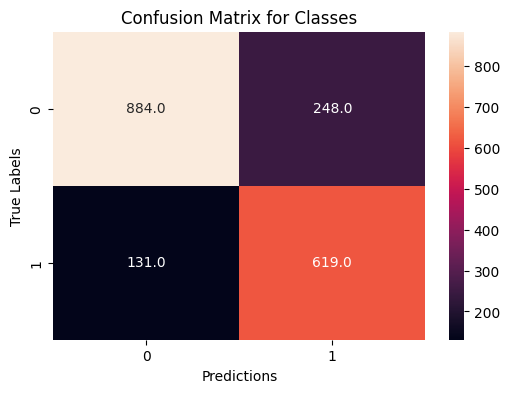

In [ ]:
absolutist_words = ['absolutely', 'all', 'always', 'complete', 'completely', 'constant', 'constantly', 'definitely', 'entire', 'ever', 'every', 'everyone', 'everything', 'full', 'must', 'never', 'nothing', 'totally', 'whole']

import re

def count_absolutist_words(text, absolutist_words):
    count = 0
    for word in absolutist_words:
        pattern = r'\b' + re.escape(word) + r'\b'
        count += len(re.findall(pattern, text, re.IGNORECASE))
    return count


df['count']= df['post_text'].apply(lambda x: count_absolutist_words(x, absolutist_words))

In [ ]:
# Filter the words that are tagged as personal pronouns
first_person_pronouns = ['I', 'me', 'my', 'mine', 'we', 'us', 'our', 'ours', 'myself', 'ourselves']


def count_firstperson_words(text, first_person_pronouns):
    count = 0
    for word in first_person_pronouns:
        pattern = r'\b' + re.escape(word) + r'\b'
        count += len(re.findall(pattern, text, re.IGNORECASE))
    return count

df['first_person']= df['post_text'].apply(lambda x: count_firstperson_words(x, first_person_pronouns))

print(df['first_person'], df['count'])




# Count the number of words in each text
df['word_count'] = df['post_text'].apply(lambda x: len(str(x).split()))

In [ ]:
depressed_group = df[df['label']==1]
depressed_group = depressed_group['user_id'].unique()
depressed_mean =[]
depressed_word_count=[]
for depressed in depressed_group:
  user_1013187241_f = df[df['user_id'] == depressed]
  user_1013187241_f_absol = user_1013187241_f['word_count']
  depressed_word_count.append(user_1013187241_f_absol.sum()/len(user_1013187241_f_absol))
  print(user_1013187241_f_absol.sum()/len(user_1013187241_f_absol))
  depressed_mean.append(user_1013187241_f_absol.sum()/len(user_1013187241_f_absol))

print('mean:', sum(depressed_mean)/len(depressed_mean))


normal_group = df[df['label']==0]
normal_group = normal_group['user_id'].unique()

normal_mean =[]
for normal in normal_group:
  user_1013187241_f = df[df['user_id'] == normal]
  user_1013187241_f_absol = user_1013187241_f['word_count']
  #print((len(user_1013187241_f_absol)))
  #print(sum(user_1013187241_f_absol))
  print(user_1013187241_f_absol.sum()/len(user_1013187241_f_absol))
  normal_mean.append(user_1013187241_f_absol.sum()/len(user_1013187241_f_absol))

print('mean:', sum(normal_mean)/len(normal_mean))

import matplotlib.pyplot as plt

# Sample data
users = [i for i in range(len(normal_mean))]

# Create a bar chart
plt.bar(users, normal_mean)
plt.axhline(sum(normal_mean)/len(normal_mean), color='red', linestyle='--', label='Mean')

# Add labels and title
plt.xlabel('User')
plt.ylabel('Values')
plt.title('Avg word count per normal user')

# Display the chart
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Sample data
users = [i for i in range(len(depressed_word_count))]

# Create a bar chart
plt.bar(users, depressed_word_count)

plt.axhline(sum(depressed_mean)/len(depressed_mean), color='red', linestyle='--', label='Mean')


# Add labels and title
plt.xlabel('User')
plt.ylabel('Values')
plt.title('Avg Word Count per depressed user')

# Display the chart
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a text string or load your data
text = "text in string format"

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()